# **TELECOM CHURN ANALYSIS**

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve, classification_report
from sklearn import metrics
import time
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
#Import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read files
df_20 = pd.read_csv('/content/drive/MyDrive/MCI Test/churn-bigml-20.csv')
df_80 = pd.read_csv('/content/drive/MyDrive/MCI Test/churn-bigml-80.csv')

# **1- Data overview**

## **Check each dataset**

In [ ]:
df_20.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
#Info
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [ ]:
#Shape
df_20.shape

(667, 20)

In [ ]:
#Duplicate
duplicate_row = df_20[df_20.duplicated()]
len(duplicate_row)

0

In [ ]:
#df_80
df_80.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#Info
df_80.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
#Shape
df_80.shape

(2666, 20)

In [ ]:
#Duplicate
duplicate_row = df_80[df_80.duplicated()]
len(duplicate_row)

0

It can be seen that these 2 datasets are divided from 1 original dataset to use for ML. For an overview, concat them.

In [ ]:
#Concat
df = pd.concat([df_20,df_80], axis = 0)

## **Data overview**

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
df.shape

(3333, 20)

**Data information**
This data has 3333 rows and 20 columns, includes:
*   State: State where the customer lives

*   Account lenght: The length of time a customer uses a business's services

*   Area code: Area code

*   International plan: Indicates whether the customer is subscribed to an international calling plan (Yes or No)

*   Voice mail plan: Indicates whether the customer is subscribed to a voice mail service plan (Yes or No)

*   Number vmail messages: The number of voicemail messages the customer has received

*   Total day minutes: Total number of calling minutes during daytime hours

*   Total day calls: Total number of calls made during the daytime

*   Total day charge: Total charges for calls during daytime hours

*   Total eve minutes: Total number of calling minutes during the evening hours

*   Total eve calls: Total number of calls made during the evening

*   Total eve charge: Total charges for calls during evening hours

*   Total night minutes: Total number of calling minutes during night time

*   Total night calls: Total number of calls made during night time

*   Total night charge: Total charges for calls during night time

*   Total intl minutes: Total international calling minutes

*   Total intl calls: Total number of international calls

*   Total intl charge: Total charges for international calls

*   Customer service calls: Total customer service calls

*   Churn: Indicates whether the customer churned (True is Yes, False is No)


This dataset likely comes from a **telecommunications service provider** or **phone service business**. Because this data clearly represents customer phone service usage tracking, including number of minutes and calls during different time periods (day, evening, night) as well as international phone calls. The service plan columns show customer subscriptions to additional services such as international calling and voice mail.

In [ ]:
#Check Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   float

In [ ]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
#Check duplicate
duplicate_row = df[df.duplicated]
len(duplicate_row)

0

**Check if the dataset has negative values or not**

In [ ]:
#Filter out columns with numeric data types (int and float)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
#Check
contains_negative = (numeric_df < 0).any().any()
if contains_negative:
    print("DataFrame contains negative values.")
else:
    print("DataFrame does not contain any negative values.")

DataFrame does not contain any negative values.


**Check values in categorical columns**

In [ ]:
#International plan
df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#Voice mail plan
df['Voice mail plan'].unique()

array(['No', 'Yes'], dtype=object)

**Conclusion:** This dataset seems quite good. It has no null or duplicate values and these data types is correct. Besides, the data in the columns is reasonable.

# **2-EDA**

## **Check target variable**

In [ ]:
#Value_counts
df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

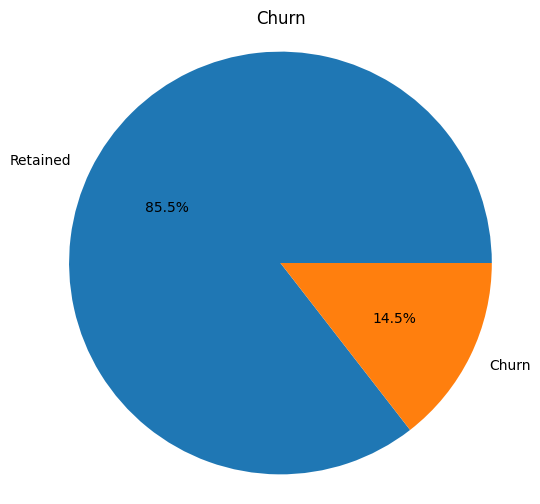

In [ ]:
#Pie chart
labels = ['Retained','Churn']
counts = df['Churn'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Churn')
plt.axis('equal')
plt.show()

There are 2850 users (85,5%) retained and 483 users (14,5%) churned. **This data is highly imbalanced**, it need to be processed before building the models.

## **Plot distribution of individual predictors by churn**

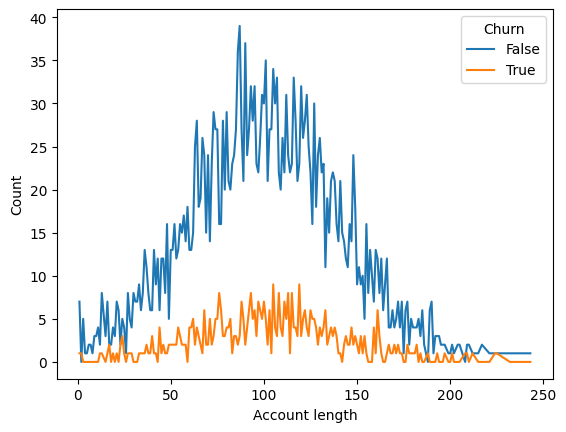

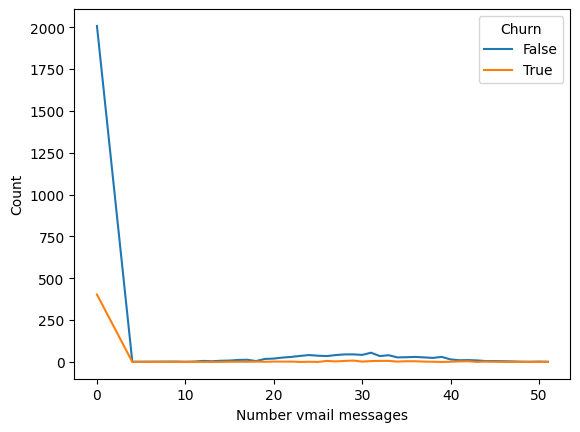

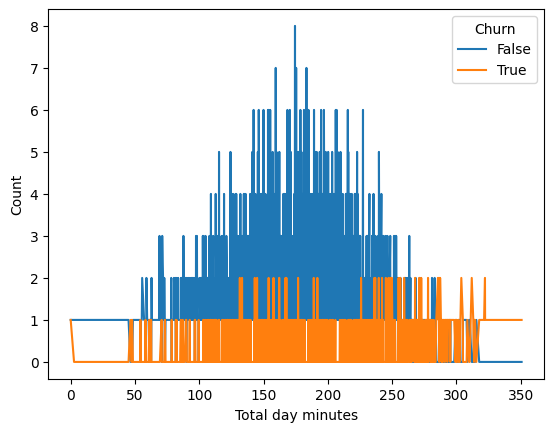

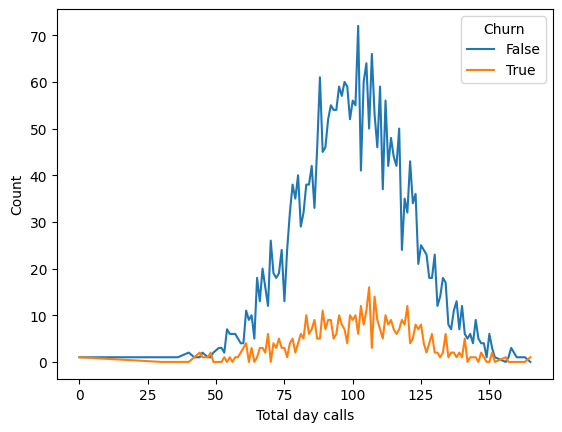

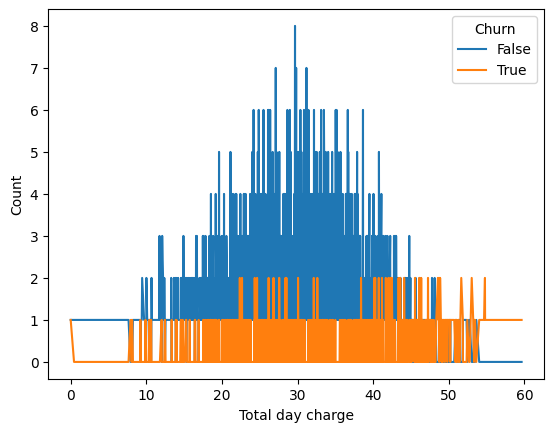

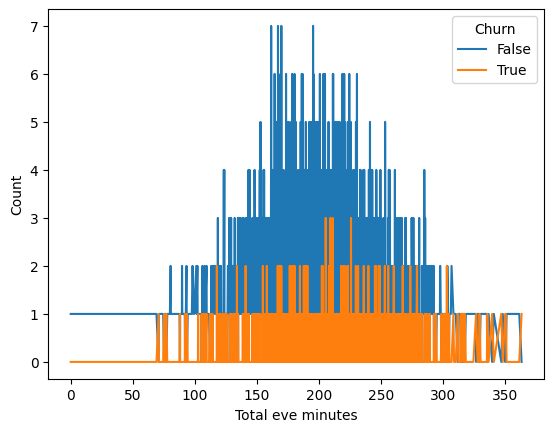

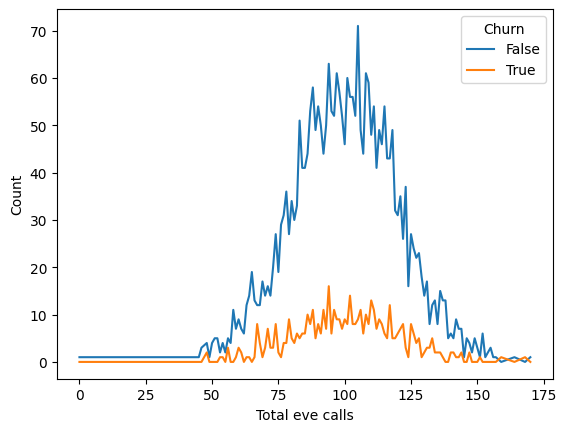

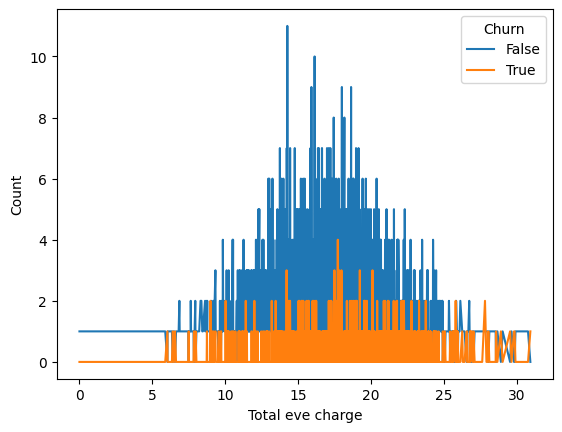

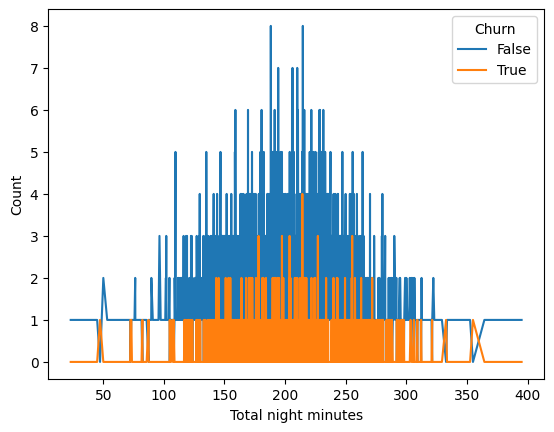

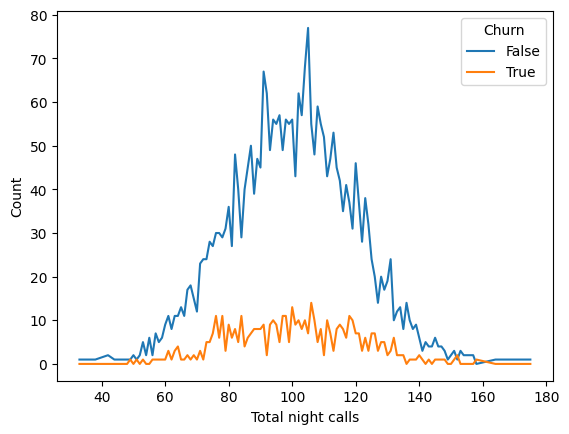

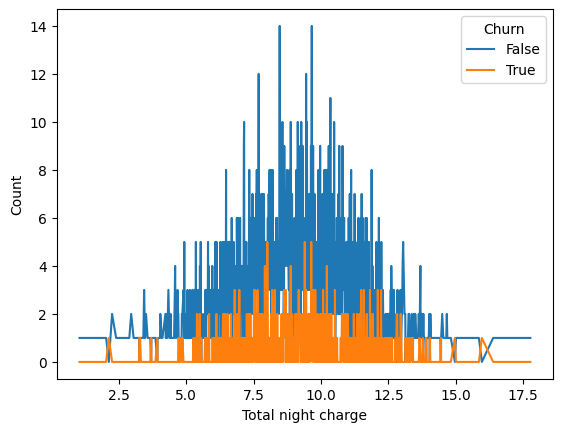

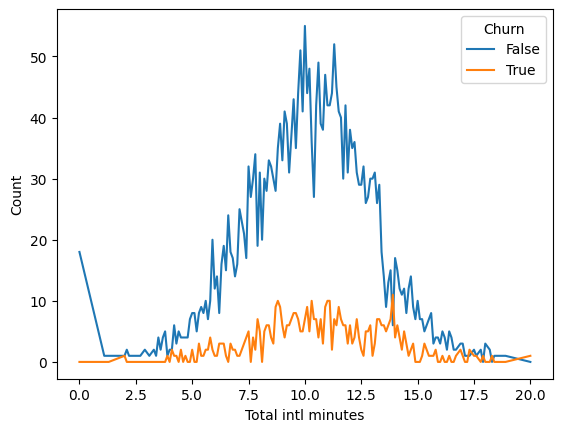

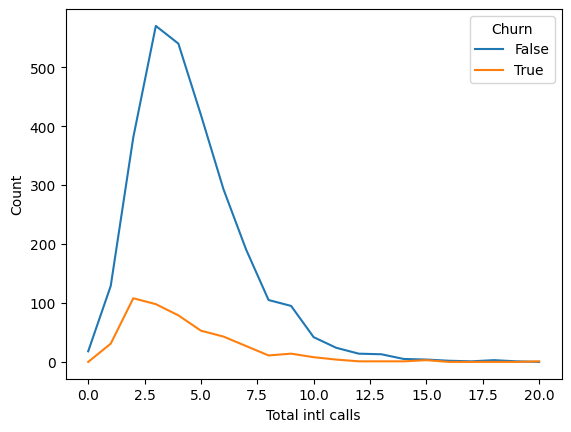

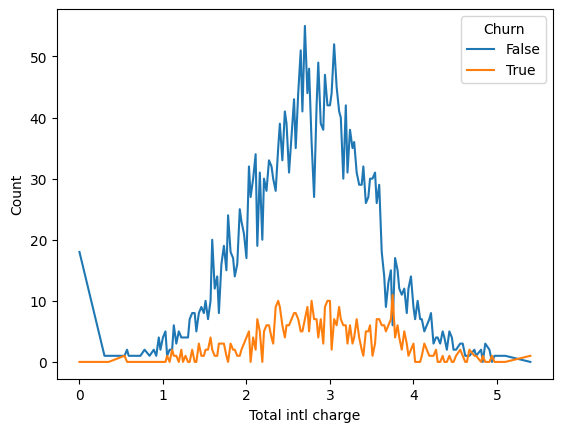

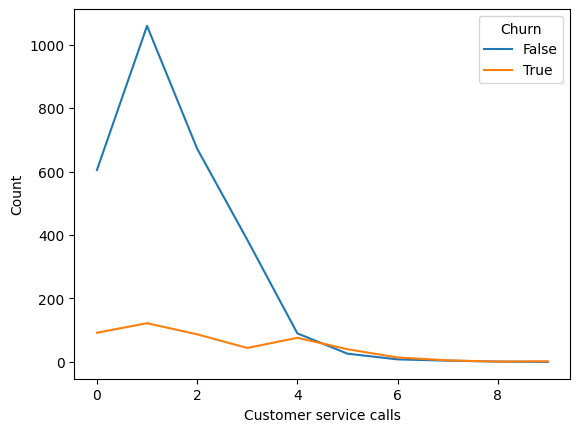

In [ ]:
#Line Chart
for i in df[['Account length','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls']]:
  counts = df.groupby(i)['Churn'].value_counts().unstack().fillna(0)
  counts.plot(kind='line')

  plt.xlabel(i)
  plt.ylabel('Count')
  plt.legend(title='Churn')
  plt.show()

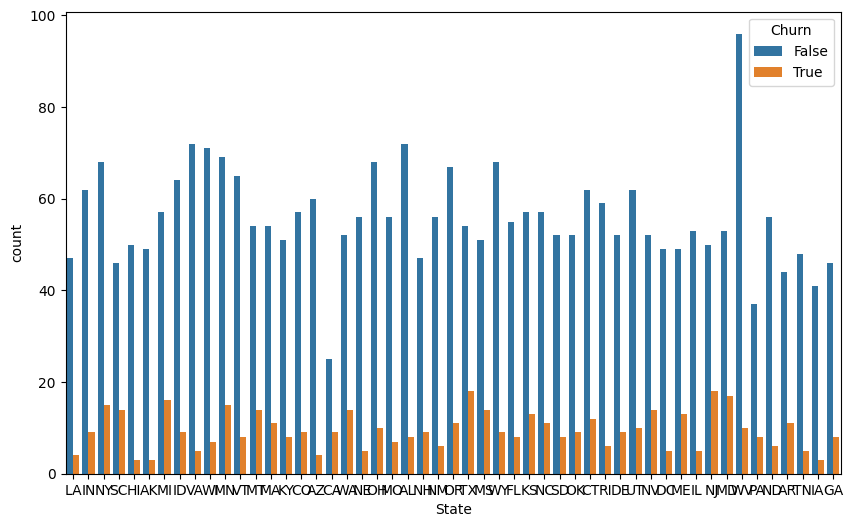

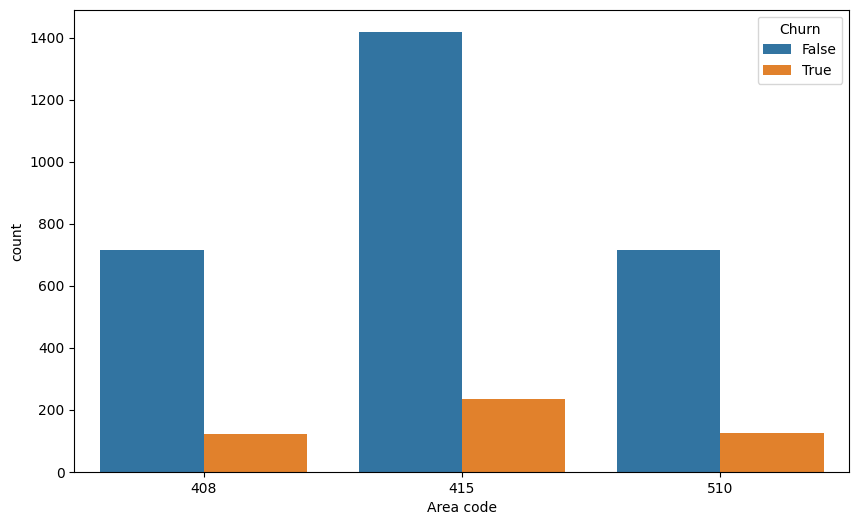

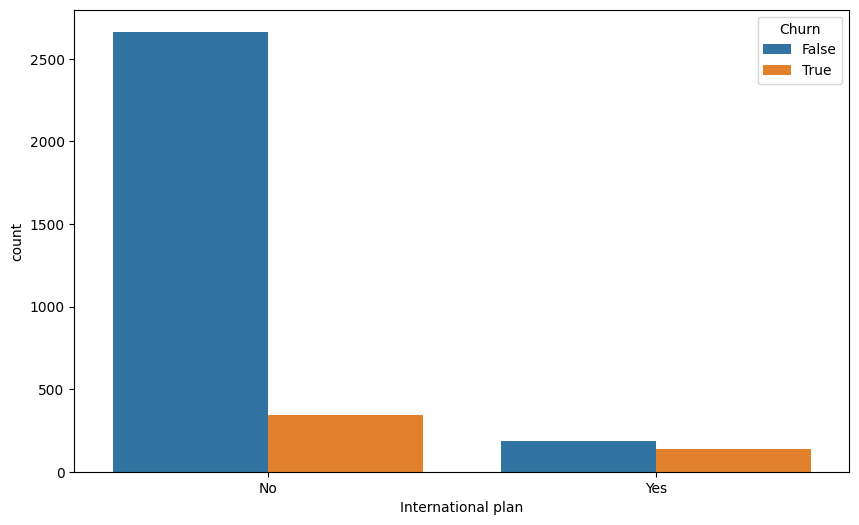

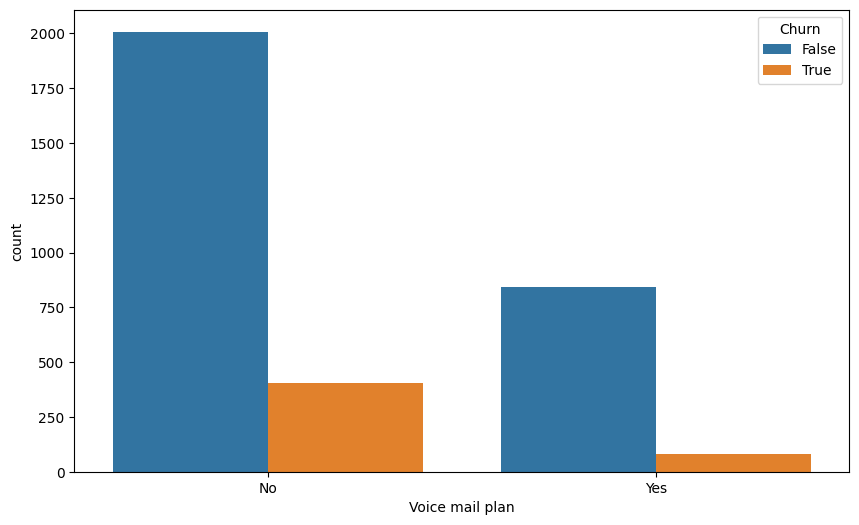

In [ ]:
#Bar chart
for i, predictor in enumerate(df.drop(columns=['Account length','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls','Churn'])):
    plt.figure(i, figsize=(10, 6))
    sns.countplot(data=df, x=predictor, hue='Churn')

## **Heatmap**

In [ ]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_heat = df.copy()
for col in df_heat.columns:
  if df_heat[col].dtype == 'object':
    df_heat[col] = label_encoder.fit_transform(df_heat[col])

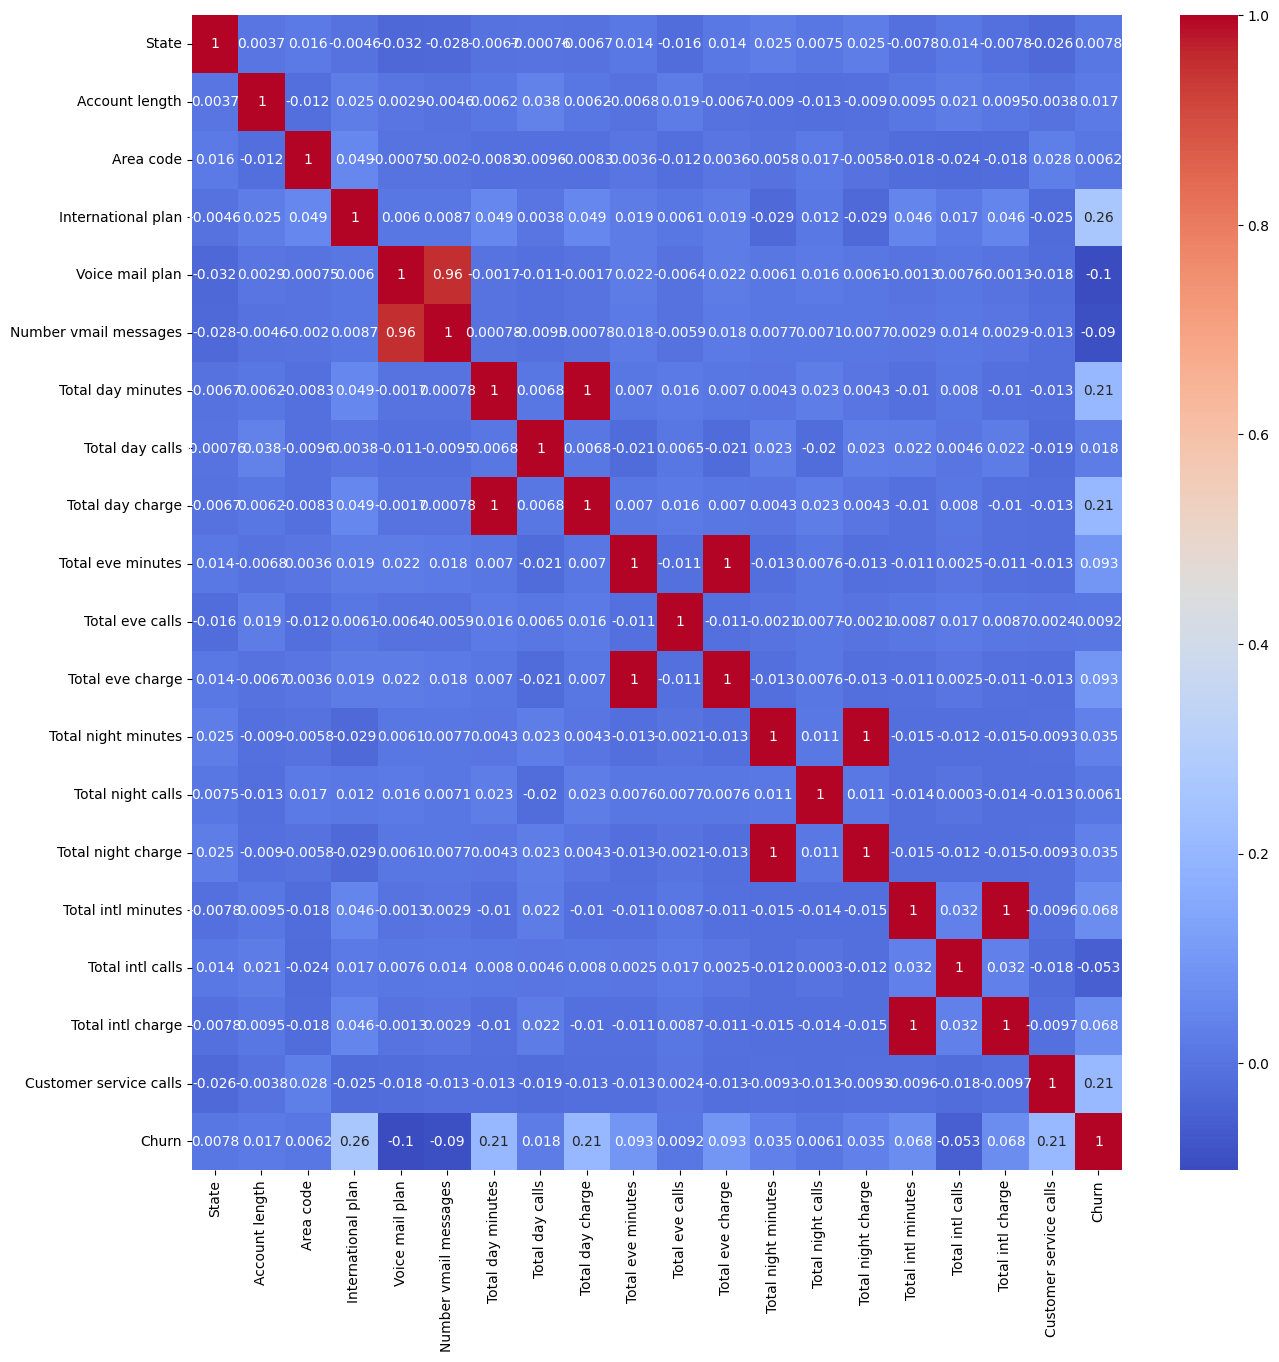

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df_heat.corr(), cmap = 'coolwarm', annot = True)
plt.show()

## **Insights**

### **1- Churn rates increase when the number of service calls increases**

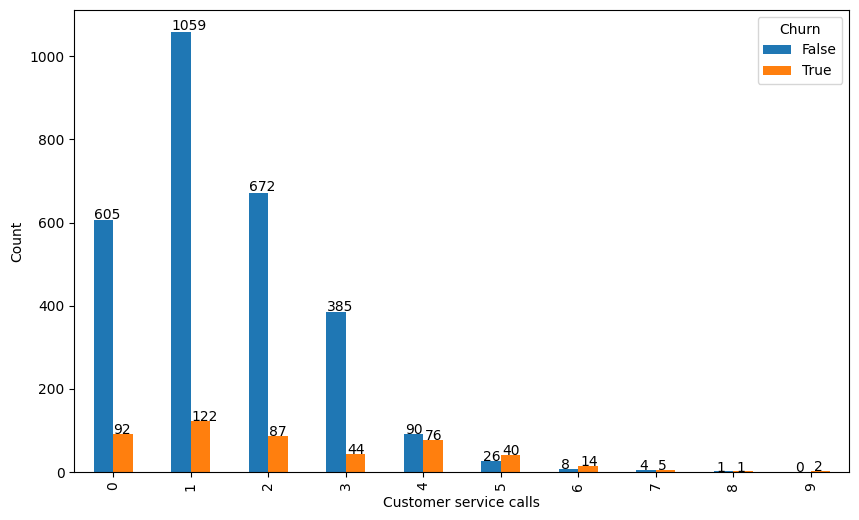

In [ ]:
  #Chart
  counts = df.groupby(['Customer service calls'])['Churn'].value_counts().unstack().fillna(0)
  ax = counts.plot(kind='bar', figsize=(10, 6))
  for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))
  plt.xlabel('Customer service calls')
  plt.ylabel('Count')
  plt.legend(title='Churn')
  plt.show()

Through the chart, we can see that the number of customers retained is always higher. However, with a total number of calls of 4, the number of customers churned and retained is almost equal. And from the 5th call, the number of customer churned is always higher.

### **2- More customers churn when Total day minutes is greater than 300 and Total day charge is greater than 50**

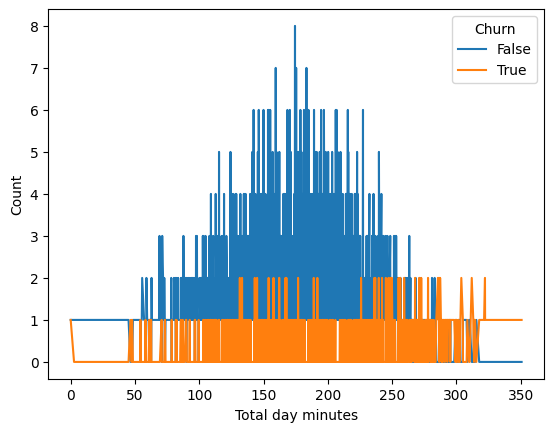

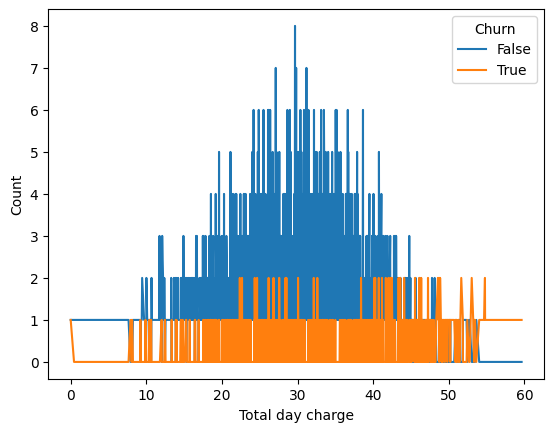

In [ ]:
#Chart
for i in df[['Total day minutes','Total day charge']]:
  counts = df.groupby(i)['Churn'].value_counts().unstack().fillna(0)
  counts.plot(kind='line')

  plt.xlabel(i)
  plt.ylabel('Count')
  plt.legend(title='Churn')
  plt.show()

Through the chart, we see that the number of customers retained is always higher, but when the Total day minutes is greater than 300, the number of customers churned is higher. The same thing happens when Total day charge is greater than 50. This is understandable because these two factors are closely related; the more you call, the higher the cost.

### **3- Churn rates increase when the customers subcribed the International plan**

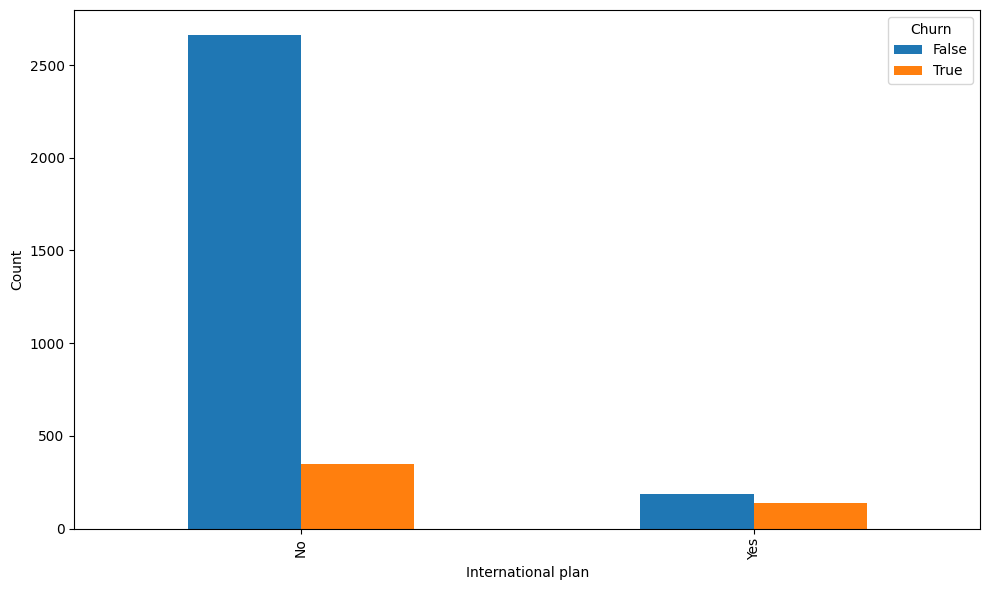

In [ ]:
  #Chart
  counts = df.groupby(['International plan'])['Churn'].value_counts().unstack().fillna(0)
  ax = counts.plot(kind='bar', figsize=(10, 6))
  plt.xlabel('International plan')
  plt.ylabel('Count')
  plt.legend(title='Churn')
  plt.tight_layout()
  plt.show()

For the group of customers who didn't subcribe for the International plan, the number of retained customers was significantly higher. However, for subcribed groups, the number of retained customers and churned customers was almost equal.

In [ ]:
df.to_csv('MCI.csv', index = False)

# **3- Data preprocessing**

**Label Encoder**

In [ ]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#Make copies
df_80ml = df_80.copy()
df_20ml = df_20.copy()
#Tranform
for col in df_80ml.select_dtypes(include=['object', 'bool']).columns:
    #Tranform df_80
    df_80ml[col] = label_encoder.fit_transform(df_80ml[col])
    #Tranform for df_20 with trained LabelEncoder
    df_20ml[col] = label_encoder.transform(df_20ml[col])

In [ ]:
df_20ml.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,15,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,34,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,40,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [ ]:
df_80ml.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Train test split**

In [ ]:
X_train = df_80ml.drop('Churn', axis = 1)
y_train = df_80ml['Churn']
X_test = df_20ml.drop('Churn', axis = 1)
y_test = df_20ml['Churn']

# **4- Build and evaluate models**

Since this is an imbalanced dataset, in addition to the Classification Accuracy, I will use the Confusion Matrix to evaluate models.

In [ ]:
#Create a def to evaluate models
def EvaluateModel(model, y_test, y_pred=None, plot=False):

    if y_pred is None:
        y_pred = model.predict(X_test)

    # Confusion matrix
    confusion = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

    # Training time start
    start_time = time.time()

    # visualize Confusion Matrix
    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Training time end

    end_time = time.time()
    training_time = end_time - start_time

    print('Training Time:', training_time, 'seconds')

    # Classification Accuracy:
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Classification Accuracy:', accuracy)

    # Classification Error:
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred))

    # Classification Report
    print('Classification Report:')
    print(classification_report(y_test, y_pred, zero_division=0))

## **Decision Tree**

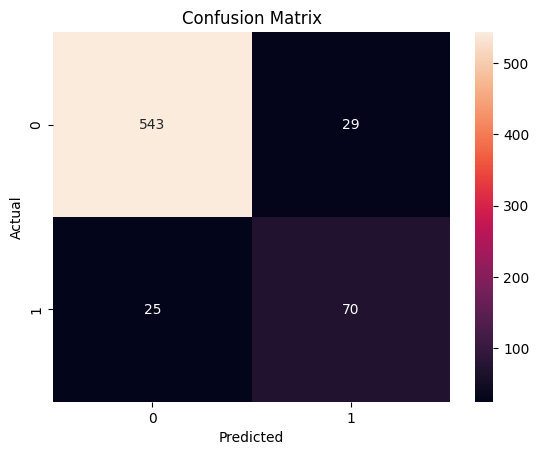

Training Time: 0.2348172664642334 seconds
Classification Accuracy: 0.9190404797601199
Classification Error: 0.08095952023988007
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       572
           1       0.71      0.74      0.72        95

    accuracy                           0.92       667
   macro avg       0.83      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train,y_train)
EvaluateModel(dt_model, y_test, plot=False)

The accuracy is quite high, but this is an an imbalanced dataset, therefore it's not so important.

I used Confusion Matrix, then check precision, recall and f1-score for each class. These indexs is very high for class 0 but they are a bit low for class 1.

In my opinion, accurate prediction for layer 1 is very important, because it represents the class of customers likely to leave, which businesses are always concerned about first.

Try using SMOTEENN to increase the number of samples of the minority class - class 1, then Check the model again

**Resample with Smoteenn**

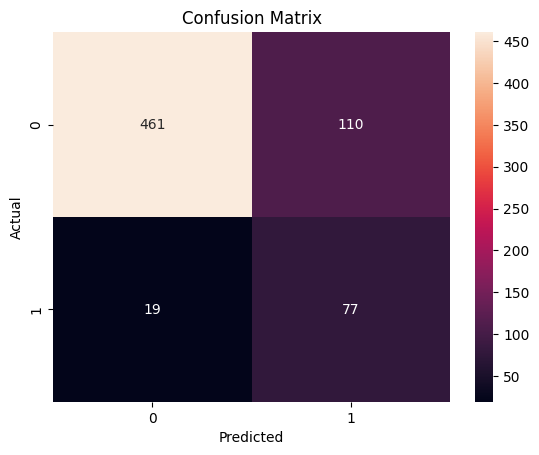

Training Time: 0.27168989181518555 seconds
Classification Accuracy: 0.8065967016491754
Classification Error: 0.1934032983508246
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       571
           1       0.41      0.80      0.54        96

    accuracy                           0.81       667
   macro avg       0.69      0.80      0.71       667
weighted avg       0.88      0.81      0.83       667



In [ ]:
#Smoteenn
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
Xr_train,yr_train = smote_enn.fit_resample(X_train,y_train)#Try Decision Tree again
dt_model = dt.fit(Xr_train,yr_train)
EvaluateModel(dt_model, y_test, plot=False)

In [ ]:
y_test.value_counts()

Churn
0    571
1     96
Name: count, dtype: int64

After use Smoteenn, the recall of class 1 was a bit higher, This is quite good because it shows that the model correctly predicted more customers who actually churned, but its precision dropped sharply. So I tried adjusting the parameters of Smoteenn (k_neighbor and EditedNearestNeighbours)

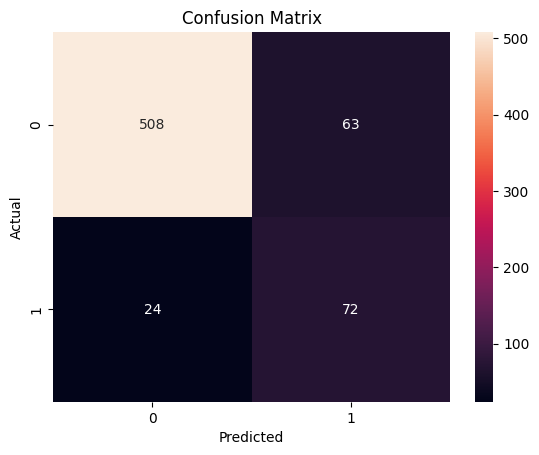

Training Time: 0.30144381523132324 seconds
Classification Accuracy: 0.8695652173913043
Classification Error: 0.13043478260869568
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       571
           1       0.53      0.75      0.62        96

    accuracy                           0.87       667
   macro avg       0.74      0.82      0.77       667
weighted avg       0.89      0.87      0.88       667



In [ ]:
#Adjust parameters of Smoteenn
smote_enn = SMOTEENN(random_state=42, smote=SMOTE(k_neighbors=22), enn=EditedNearestNeighbours(n_neighbors=3))
Xr_train,yr_train = smote_enn.fit_resample(X_train,y_train)
dt_model = dt.fit(Xr_train,yr_train)
EvaluateModel(dt_model, y_test, plot=False)

Nothing better.

Decision Tree model has the best performance with original training set and test set. The precision and recall of class 1 are both greater than 0.7, with the highest accuracy.


## **Random Forest**

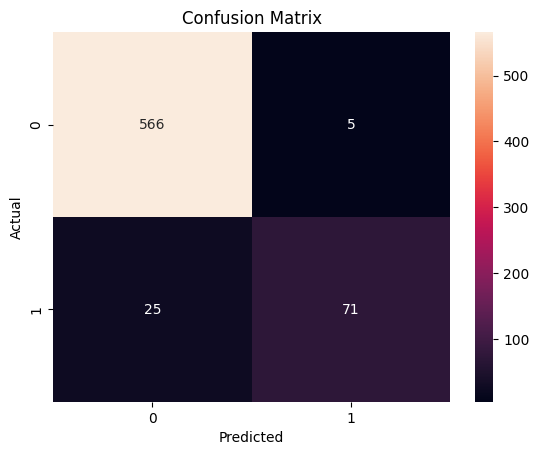

Training Time: 0.26821279525756836 seconds
Classification Accuracy: 0.9550224887556222
Classification Error: 0.044977511244377766
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       571
           1       0.93      0.74      0.83        96

    accuracy                           0.96       667
   macro avg       0.95      0.87      0.90       667
weighted avg       0.95      0.96      0.95       667



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train,y_train)
EvaluateModel(rf_model, y_test, plot=False)

This model looks quite good with 0,93 precision and 0,74 recall. Try to use Smootenn to see if it can increase recall of class 1.

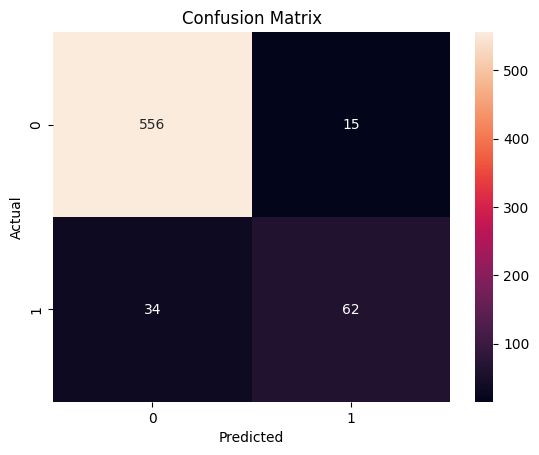

Training Time: 1.0164685249328613 seconds
Classification Accuracy: 0.9265367316341829
Classification Error: 0.07346326836581707
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       571
           1       0.81      0.65      0.72        96

    accuracy                           0.93       667
   macro avg       0.87      0.81      0.84       667
weighted avg       0.92      0.93      0.92       667



In [ ]:
#Use Smoteenn
smote_enn = SMOTEENN(random_state=42, smote=SMOTE(k_neighbors=5), enn=EditedNearestNeighbours(n_neighbors=5))
Xr_train,yr_train = smote_enn.fit_resample(X_train,y_train)
rf_model = rf.fit(Xr_train,yr_train)
EvaluateModel(rf_model, y_test, plot=False)

Both recall and precision of class 1 decrease.

## **K-Nearest Neighbor (KNN)**

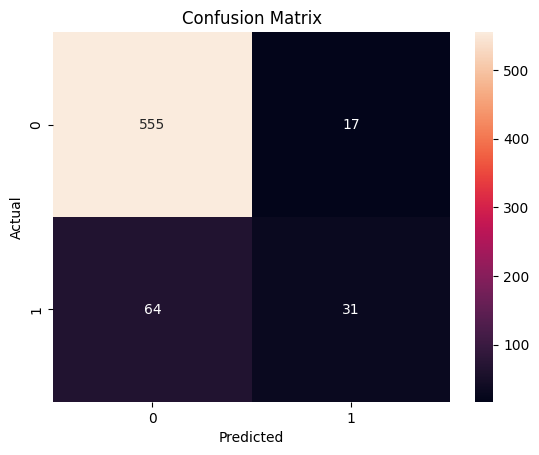

Training Time: 0.2649655342102051 seconds
Classification Accuracy: 0.8785607196401799
Classification Error: 0.1214392803598201
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       572
           1       0.65      0.33      0.43        95

    accuracy                           0.88       667
   macro avg       0.77      0.65      0.68       667
weighted avg       0.86      0.88      0.86       667



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)
EvaluateModel(knn_model, y_test, plot=False)

This model predicts very poorly for class 1.

## **Support Vector Machine (SVM)**

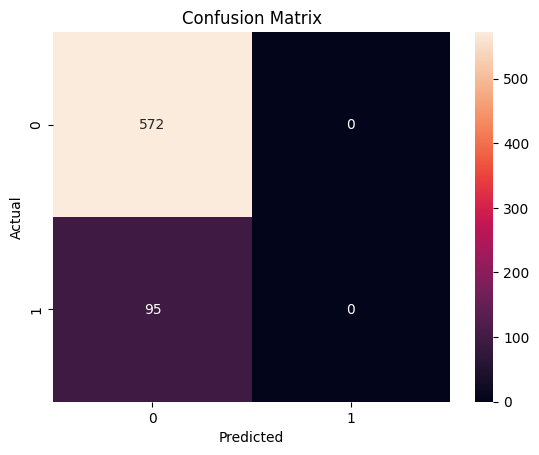

Training Time: 0.23446226119995117 seconds
Classification Accuracy: 0.8575712143928036
Classification Error: 0.1424287856071964
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       572
           1       0.00      0.00      0.00        95

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.74      0.86      0.79       667



In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc_model = svc.fit(X_train,y_train)
EvaluateModel(svc_model, y_test, plot=False)

This model does not predict any cases for class 1. Try to use Smoteenn.

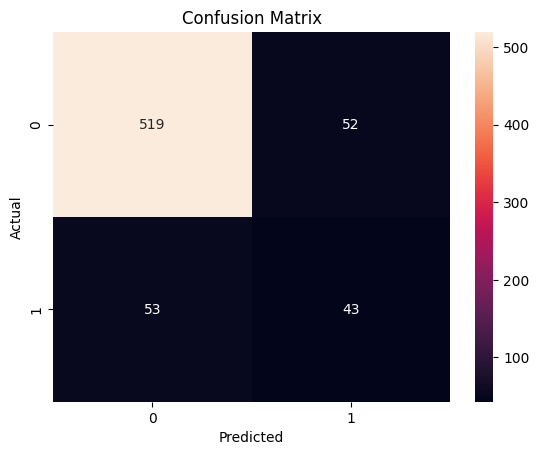

Training Time: 0.3915736675262451 seconds
Classification Accuracy: 0.8425787106446777
Classification Error: 0.1574212893553223
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       571
           1       0.45      0.45      0.45        96

    accuracy                           0.84       667
   macro avg       0.68      0.68      0.68       667
weighted avg       0.84      0.84      0.84       667



In [ ]:
#Smoteenn
smote_enn = SMOTEENN(random_state=42, smote=SMOTE(k_neighbors=5), enn=EditedNearestNeighbours(n_neighbors=5))
Xr_train,yr_train = smote_enn.fit_resample(X_train,y_train)
svc_model = svc.fit(Xr_train,yr_train)
EvaluateModel(svc_model, y_test, plot=False)

Similar to the KNN model, this model predicts poorly for class 1.

## **Conclusion**

*   The best model is **Random Forest** with the highet Classification Accuracy and best prediction for class 1
*   Decision Tree is also a good model with the shortest training time

